# Imports

In [22]:
import tensorflow as tf
import tensorflow_datasets as tfds
import keras
from keras.models import Sequential
from keras.layers import Dense
SEED = 1

# Building dataset 

In [2]:
# Construct a tf.data.Dataset
ds = tfds.load('colorectal_histology', split='train', shuffle_files=True)

# Build your input pipeline
ds = ds.shuffle(1024).batch(32).prefetch(tf.data.AUTOTUNE)
for example in ds.take(1):
  image, label = example["image"], example["label"]


2022-12-17 13:12:33.352490: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-17 13:12:33.352512: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Momo-linux): /proc/driver/nvidia/version does not exist
2022-12-17 13:12:33.354025: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
type(image)


tensorflow.python.framework.ops.EagerTensor

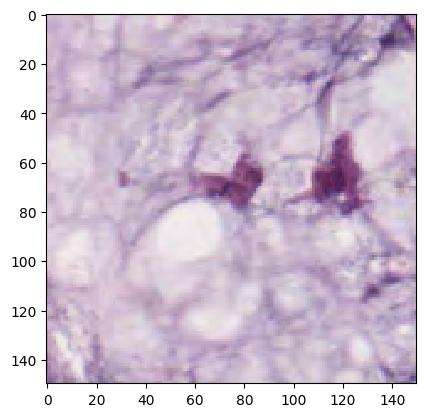

In [4]:
from matplotlib import pyplot as plt
plt.imshow(image[3], interpolation='nearest')
plt.show()

# Loading full datasest 

The dataset is made of 5000 images of 150x150 with 3 chanels

In [5]:
def make_data (train_test_ratio):
    ds = tfds.load('colorectal_histology', split='train', shuffle_files=True)
    X = []
    y = []
    for example in ds:
        X.append(example["image"])
        y.append(example["label"])
    X_train = X[:int(len(X)*train_test_ratio)]
    y_train = y[:int(len(X)*train_test_ratio)]
    X_test = X[int(len(X)*train_test_ratio):]
    y_test = y[int(len(X)*train_test_ratio):]
    return X_train, y_train, X_test, y_test

In [6]:
X_train, y_train, X_test, y_test = make_data(0.8)

### Baseline model

In [8]:
model = keras.Sequential([
    keras.layers.Dense()])

TypeError: __init__() missing 1 required positional argument: 'units'

### Trying flower tp

In [34]:
# Load DS
ds = tfds.load('colorectal_histology', split='train', shuffle_files=True)
#Split
train_ds, val_ds = tf.keras.utils.split_dataset(ds, left_size=.7, right_size=.3, shuffle = True, seed=SEED)


2022-12-17 13:26:06.203917: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 236250000 exceeds 10% of free system memory.
2022-12-17 13:26:06.806262: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 101250000 exceeds 10% of free system memory.


In [33]:
train_ds


normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


TypeError: in user code:


    TypeError: <lambda>() missing 1 required positional argument: 'y'


In [29]:
# set seed for reproducibility
tf.keras.utils.set_random_seed(SEED)

num_classes = 8

# TODO complete the list of layers
model = models.Sequential([
    # include preprocessing layer, along with the input shape
    tf.keras.layers.Rescaling(scale = 1/255, input_shape=image.shape[1:]),
    # TODO complete the Conv2D calls
    layers.Conv2D(16,3,padding="same",activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    # TODO include the final D[ense layers
    layers.Dense(128, activation='relu'),
    layers.Dense(5),
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 37, 37, 64)       

In [30]:
# TODO your code here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [31]:
# deirectory in which modelcheckpoints and logs are saved
LOG_DIR = 'colorectal'

def best_model_path(model_name):
    base_dir  = os.path.join(LOG_DIR, model_name)
    return os.path.join(base_dir, 'best_val_accuracy.ckpt')

def callback_list(model_name):
    base_dir  = os.path.join(LOG_DIR, model_name)
    tb_cb = tf.keras.callbacks.TensorBoard(base_dir)
    ckpt = tf.keras.callbacks.ModelCheckpoint(
         best_model_path(model_name),
         monitor='val_accuracy',
         mode='max', 
         verbose=0,
         save_best_only=True)
    backup_dir = os.path.join(base_dir, 'backup_checkpoint')
    bkp = tf.keras.callbacks.BackupAndRestore(
        backup_dir)
    return [tb_cb, ckpt, bkp]


In [32]:
EPOCHS = 10
# this dictionnary will stock the logs for each model trained throughout this notebook
logs = {}

# TODO complete the fit call
logs[MODEL_NAME] = model.fit(train_ds,
                             validation_data=val_ds,
                             epochs=EPOCHS
                            )


Epoch 1/10


ValueError: in user code:

    File "/home/arno/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "/home/arno/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/arno/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "/home/arno/miniconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "/home/arno/miniconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/arno/miniconda3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 197, in assert_input_compatibility
        raise ValueError(

    ValueError: Missing data for input "rescaling_5_input". You passed a data dictionary with keys ['filename', 'image', 'label']. Expected the following keys: ['rescaling_5_input']
